# Projeto 2
## Análise de dados dos passageiros do Titanic
###### Esse projeto tem como objetivo explorar um conjunto de dados fornecidos pelo site Kaggle sobre passageiros do Titanic, um navio que naufragou em 1912 após colidir com um iceberg.O acidente matou 1502 dos seus 2224 passageiros.Esse fato chocou a comunidade internacional e levou a melhorias nos regulamentos de seguranças de navios.Através da análise,procura-se quais características estão mais relacionadas com os passageiros que sobreviveram.

In [1]:
#Importando as bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#Criando o dataframe que será utilizado
df_titanic = pd.read_csv('titanic-data-6.csv')

#Olhando os dados que temos no dataframe e como está organizado
print('Número de colunas:{} ,número de Linhas: {}'.format(df_titanic.shape[1], df_titanic.shape[0]))
df_titanic.head()




Número de colunas:12 ,número de Linhas: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pode-se observar que no dataframe temos informações de 891 passageiros, as quais estão separadas em 12 colunas(de dados) diferentes: número do passageiro, se sobreviveu, classe sócio-econômica, nome, sexo, idade, número de irmãos e/ou cônjuge, número de parentes,passagem, cabine e local de embarque.

### 1.Questões

O primeiro passo é elaborar questões a serem respondidas com o conjunto de dados disponíveis.
Para se descobrir quais as características das pessoas mais propensas a sobreviver elaborei as seguintes questões:

#### O sexo é um fator que contribui para a sobrevivência do passageiro?
#### Há diferença na sobrevivência dos passageiros em cada faixa etária?
#### Há diferença na sobrevivência de cada classe sócio-econômica?


### 2.Preparação dos dados

Como os dados já foram fornecidos, deve-se checar se eles estão prontos para ser explorados.

In [2]:
# Checando os tipos de dados presentes:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
#Checando se há duplicadas
sum(df_titanic.duplicated())

0

In [3]:
#Checando se há dados nulos
df_titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
#Conferindo valores únicos
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### 3. Explorando os dados

### Qual a taxa de sobreviência de homens e mulheres?

In [4]:
def calc_perc_survivors(df1):
    """Calcula e imprime as taxas de sobrevivência geral e as por sexo.

    Args:
        dataframe : dataframe com os dados que serão utilizados
    Returns:
        Retorna uma lista com as porcentagens encontradas para elaboração de gráficos
    """
    #Agrupando homens em um conjunto
    survivors = df1['Survived'].mean()*100
    male_passengers = df1[df1['Sex'] == 'male']
    female_passengers = df1[df1['Sex'] == 'female']
    perc_survivors = df1['Survived'].mean()*100
    perc_male = male_passengers['Survived'].mean()*100
    perc_female = female_passengers['Survived'].mean()*100
    percents_survivors = [perc_survivors, perc_male, perc_female]
    print('A porcentagem de sobreviventes é: {0:.2f}%'.format(survivors))
    print('A porcentagem de homens que sobreviveram é de: {0:.2f}%'.format(perc_male))
    print('A porcentagem de mulheres que sobreviveram é de: {0:.2f}%'.format(perc_female))
    return percents_survivors

A porcentagem de sobreviventes é: 38.38%
A porcentagem de homens que sobreviveram é de: 18.89%
A porcentagem de mulheres que sobreviveram é de: 74.20%


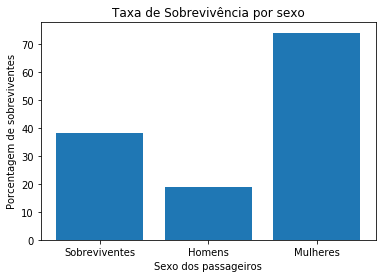

In [5]:
#Criando um gráfico que demonstre a taxa de sobrevivência de cada sexo e geral
sexes = ['Sobreviventes', 'Homens','Mulheres']
percents_survivors = calc_perc_survivors(df_titanic)
plt.title('Taxa de Sobrevivência por sexo');
plt.ylabel('Porcentagem de sobreviventes');
plt.xlabel('Sexo dos passageiros');
plt.bar(sexes, percents_survivors);


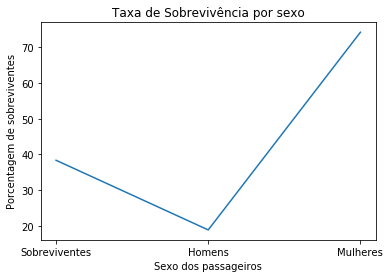

In [8]:
plt.title('Taxa de Sobrevivência por sexo');
plt.ylabel('Porcentagem de sobreviventes');
plt.xlabel('Sexo dos passageiros');
plt.plot(sexes, percents_survivors);

Em ambos os gráficos,podemos ver as diferenças nas taxas de sobrevivência entre homens e mulheres.A chance de sobreviver caso o passageiro seja mulher é visivelmente maior.

### Qual foi a taxa de sobrevivência de cada faixa etária?

In [6]:
def calc_perc_age(df1):
    """Calcula e imprime as taxas de sobrevivência de cada faixa etária

    Args:
        dataframe : dataframe com os dados que serão utilizados
    Returns:
        Retorna uma lista com as porcentagens encontradas para elaboração de gráficos
    """
    children = df_titanic.query('Age <= 12')
    perc_children = children['Survived'].mean()*100
    teen = df_titanic.query('Age <= 18 and Age > 12')
    perc_teen = teen['Survived'].mean()*100
    adult = df_titanic.query('Age < 60 and Age > 18')
    perc_adult = adult['Survived'].mean()*100
    elder = df_titanic.query('Age >= 60')
    perc_elder = elder['Survived'].mean()*100
    print('A porcentagem de crianças(até 12 anos) que sobreviveram é de: {0:.2f}%'.format(perc_children))
    print('A porcentagem de adolescentes(de 12 a 18 anos) que sobreviveram é de: {0:.2f}%'.format(perc_teen))
    print('A porcentagem de adultos(de 18 a 59 anos) que sobreviveram é de: {0:.2f}%'.format(perc_adult))
    print('A porcentagem de idosos(maiores de 60 anos) que sobreviveram é de: {0:.2f}%'.format(perc_elder))
    percent_ages = [perc_children, perc_teen, perc_adult, perc_elder]
    return percent_ages
    

A porcentagem de crianças(até 12 anos) que sobreviveram é de: 57.97%
A porcentagem de adolescentes(de 12 a 18 anos) que sobreviveram é de: 42.86%
A porcentagem de adultos(de 18 a 59 anos) que sobreviveram é de: 38.80%
A porcentagem de idosos(maiores de 60 anos) que sobreviveram é de: 26.92%


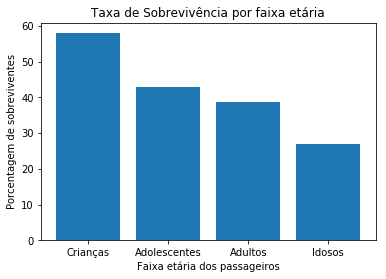

In [10]:
#Criando um gráfico que demonstre as taxas de sobrevivência de cada faixa etária
percent_ages = calc_perc_age(df_titanic)
ages = ['Crianças','Adolescentes', 'Adultos', 'Idosos']
plt.bar(ages, percent_ages);
plt.ylabel('Porcentagem de sobreviventes');
plt.xlabel('Faixa etária dos passageiros');
plt.title('Taxa de Sobrevivência por faixa etária');

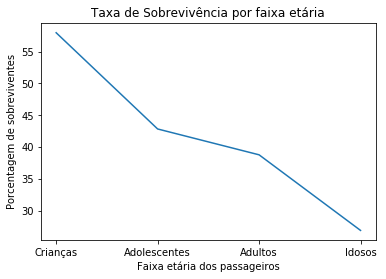

In [11]:
plt.plot(ages, percent_ages);
plt.ylabel('Porcentagem de sobreviventes');
plt.xlabel('Faixa etária dos passageiros');
plt.title('Taxa de Sobrevivência por faixa etária');

Ambos os gráficos confirmam que,conforme a faixa etária dos passageiros aumentam, as chances de sobreviver diminuem consideravelmente.

### Qual a porcentagem de sobreviventes de cada clase sócio-econômica?


In [7]:
def calc_pclasses(df1):
    """Calcula e imprime as taxas de sobrevivência por classes sócio-econômicas

    Args:
        dataframe : dataframe com os dados que serão utilizados
    Returns:
        Retorna uma lista com as porcentagens encontradas para elaboração de gráficos
    """
    classes = sorted(df1['Pclass'].unique())
    nomes_classes = ['Primeira', 'Segunda', 'Terceira']
    perc_classes = []
    for p_class in classes:
        perc_classes.append(df1.query('Pclass == @p_class')['Survived'].mean()*100)
        print('A porcentagem de sobreviventes na {} classe foi de: {}%'
              .format(nomes_classes[p_class-1], df1.query('Pclass == @p_class')['Survived'].mean()*100))
    return perc_classes   




A porcentagem de sobreviventes na Primeira classe foi de: 62.96296296296296%
A porcentagem de sobreviventes na Segunda classe foi de: 47.28260869565217%
A porcentagem de sobreviventes na Terceira classe foi de: 24.236252545824847%


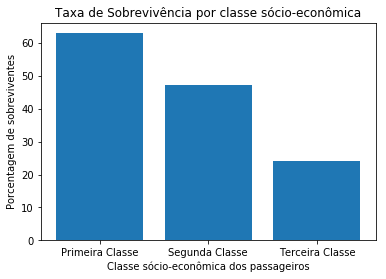

In [8]:
#Criando um gráfico de barras que demonstra as taxas de sobrevivência de cada classe
perc_classes = calc_pclasses(df_titanic)
p_classes = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
plt.bar( p_classes,perc_classes );
plt.ylabel('Porcentagem de sobreviventes');
plt.xlabel('Classe sócio-econômica dos passageiros');
plt.title('Taxa de Sobrevivência por classe sócio-econômica');


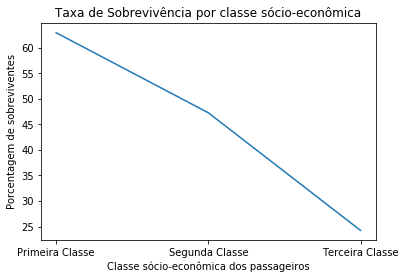

In [9]:
p_classes = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
plt.plot( p_classes,perc_classes );
plt.ylabel('Porcentagem de sobreviventes');
plt.xlabel('Classe sócio-econômica dos passageiros');
plt.title('Taxa de Sobrevivência por classe sócio-econômica');

Nesses dois últimos gráficos, podemos ver que as chances de sobreviver diminuem conforme as classes sócio-econômicas abaixando.

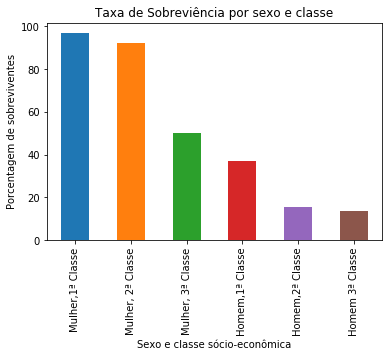

In [10]:
#Criando um gráfico mostrando a taxa de sobrevivência de cada sexo em cada classe
mean_values = df_titanic.groupby(['Sex','Pclass']).mean()*100;
mean_values['Survived'].plot(kind='bar');
plt.xlabel('Sexo e classe sócio-econômica')
plt.ylabel('Porcentagem de sobreviventes')
plt.xticks([0, 1, 2, 3, 4, 5], ['Mulher,1ª Classe', 'Mulher, 2ª Classe', 'Mulher, 3ª Classe', 'Homem,1ª Classe','Homem,2ª Classe','Homem 3ª Classe']);
plt.title('Taxa de Sobreviência por sexo e classe');

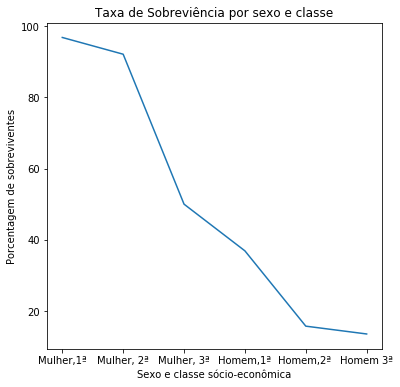

In [11]:
mean_values = df_titanic.groupby(['Sex','Pclass']).mean()*100;
mean_values['Survived'].plot(kind='line', figsize=(6,6));
plt.xlabel('Sexo e classe sócio-econômica')
plt.ylabel('Porcentagem de sobreviventes')
plt.xticks([0, 1, 2, 3, 4, 5], ['Mulher,1ª', 'Mulher, 2ª', 'Mulher, 3ª', 'Homem,1ª','Homem,2ª ','Homem 3ª']);
plt.title('Taxa de Sobreviência por sexo e classe');

Por fim, nesses gráficos podemos observar o quão discrepatante são as chances de sobrevivência ao separarmos os passageiros por classes e sexo.Esses dois últimos gráficos confirmam o que foi concluido nas primeiras análises, que mulheres apresentam uma chance consideravelmente maior de sobreviver do que homens e que as primeiras classes são privilegiadas quando comparada com as outras.

### 4. Conclusões
Como demonstrado pelos dados e gráficos obtidos com os dados disponibilizados, o sexo, a faixa etária e a classe sócio-econômica dos passageiros são determinantes para a sobrevivência do passageiro no Titanic.

Em relação ao sexo,passageiros do sexo feminino apresentam a maior taxa de sobrevivência, como foi observado na primeira análise e no gráfico "Taxa de Sobrevivência por sexo".

Pode-se observar também que taxa de sobrevivência é inversamente proporcional a idade dos passageiros,a porcentagem de sobreviventes diminui conforme a idade dos passageiros aumenta,conforme demonstrado no gráfico "Taxa de sobrevivência por faixa etária".

Na última análise, foi demonstrado através de dados e gráficos também que a classe sócio-econômica é um fator relevante, demonstrando que passageiros da primeira classe apresentam taxas de sobrevivência maiores do que na segunda, que por sua vez é maior do que na terceira.Ao se separar por classe e sexo, a diferença se torna ainda mais significativa,beirando a 97% a porcentagem de sobreviventes do sexo feminino na primeira classe,e mais do que 36% de sobreviventes do sexo masculino,porcentagem que,apesar de não muito alta,é maior que o dobro das taxas de sobrevivência do sexo masculino na segunda classe (aproximadamente 16%) e da terceira (menor que 14%).
### Limitações
Há alguns fatores que limitaram a análise,no caso os valores faltantes em Age,Cabin e Embarked.
    
    Medidas tomadas:
        *Em primeira instância eliminei os valores faltantes,porém quando foi feita a análise percebi que os resultados diferenciavam muito do que era esperado.Como utilizei apenas a coluna "Age" da qual havia valores faltantes na análise,optei por não fazer alterações no dataframe.Por isso, é importante considerar que a análise não fornece valores exatos, porém os dados conseguem representar algo próximo a realidade e fornecem informações relevantes sobre o caso.




 